## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

In [3]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [4]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
#5 Prepare  X (independent variables) and y (dependent variable)
X=df.iloc[:,0]
y=df.iloc[:,1:]
print(X)
print(y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64
     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544 

/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


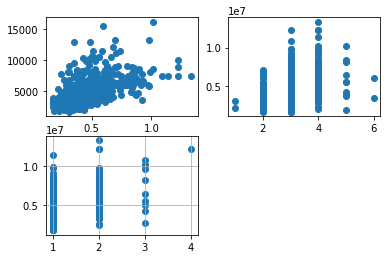

In [6]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt
#in scatter we should compare input and output and in this data set 0th column is response/indepent/output and compare with remaining col  
plt.subplot(2,2,1)
plt.scatter(df.iloc[:,0].values, df.iloc[:,1])
plt.subplot(2,2,2)

plt.scatter(df.iloc[:,2].values, df.iloc[:,0])
plt.subplot(2,2,3)

plt.scatter(df.iloc[:,3].values, df.iloc[:,0])
plt.grid()

In [16]:
#7 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data=df.select_dtypes(include=['object']).columns
for col in data:
        df[col]=le.fit_transform(df[col])
    

print(df)
le.fit_transform(df['furnishingstatus'])


        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

array([0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1,
       0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1,
       2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 1, 1,
       1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1,
       0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1,

In [17]:
#8 Avoiding the Dummy Variable Trap
import pandas as pd
dum=pd.get_dummies(df,columns=['mainroad','guestroom','basement','hotwaterheating','prefarea','airconditioning'],drop_first=True)
print(dum)

        price  area  bedrooms  bathrooms  stories  parking  furnishingstatus  \
0    13300000  7420         4          2        3        2                 0   
1    12250000  8960         4          4        4        3                 0   
2    12250000  9960         3          2        2        2                 1   
3    12215000  7500         4          2        2        3                 0   
4    11410000  7420         4          1        2        2                 0   
..        ...   ...       ...        ...      ...      ...               ...   
540   1820000  3000         2          1        1        2                 2   
541   1767150  2400         3          1        1        0                 1   
542   1750000  3620         2          1        1        0                 2   
543   1750000  2910         3          1        1        0                 0   
544   1750000  3850         3          1        2        0                 2   

     mainroad_1  guestroom_1  basement_

In [8]:
dum=pd.get_dummies(df.iloc[:,-1],drop_first=True).replace({True:1,False:0})
print(dum.head(10))

   semi-furnished  unfurnished
0               0            0
1               0            0
2               1            0
3               0            0
4               0            0
5               1            0
6               1            0
7               0            1
8               0            0
9               0            1


/tmp/ipykernel_6370/2026863495.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dum=pd.get_dummies(df.iloc[:,-1],drop_first=True).replace({True:1,False:0})


In [11]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler
num=df.select_dtypes(include=['int64','float64']).columns
le=StandardScaler()
df[num]=le.fit_transform(df[num])
print(df)


        price      area  bedrooms  bathrooms   stories mainroad guestroom  \
0    4.566365  1.046726  1.403419   1.421812  1.378217      yes        no   
1    4.004484  1.757010  1.403419   5.405809  2.532024      yes        no   
2    4.004484  2.218232  0.047278   1.421812  0.224410      yes        no   
3    3.985755  1.083624  1.403419   1.421812  0.224410      yes        no   
4    3.554979  1.046726  1.403419  -0.570187  0.224410      yes       yes   
..        ...       ...       ...        ...       ...      ...       ...   
540 -1.576868 -0.991879 -1.308863  -0.570187 -0.929397      yes        no   
541 -1.605149 -1.268613  0.047278  -0.570187 -0.929397       no        no   
542 -1.614327 -0.705921 -1.308863  -0.570187 -0.929397      yes        no   
543 -1.614327 -1.033389  0.047278  -0.570187 -0.929397       no        no   
544 -1.614327 -0.599839  0.047278  -0.570187  0.224410      yes        no   

    basement hotwaterheating airconditioning   parking prefarea  \
0       

In [10]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((436,), (109,), (436, 12), (109, 12))

In [24]:
 # Convert Series to 2D array if it's a single feature
X_train.values.reshape(-1,1)


array([[ 2345000],
       [ 3430000],
       [ 4193000],
       [ 4620000],
       [ 4585000],
       [ 6265000],
       [ 5950000],
       [ 2835000],
       [ 3990000],
       [ 3290000],
       [ 8120000],
       [ 4410000],
       [ 3150000],
       [ 3836000],
       [ 2450000],
       [ 2835000],
       [ 3675000],
       [ 4403000],
       [ 1855000],
       [ 7560000],
       [ 3500000],
       [ 6160000],
       [ 5600000],
       [ 4480000],
       [ 4319000],
       [ 5880000],
       [ 4935000],
       [ 4900000],
       [ 5600000],
       [ 9240000],
       [ 2590000],
       [ 2275000],
       [ 4193000],
       [ 2604000],
       [ 2520000],
       [ 9310000],
       [ 3150000],
       [ 2940000],
       [ 3710000],
       [12250000],
       [ 3430000],
       [ 4767000],
       [ 7980000],
       [ 2660000],
       [ 3220000],
       [ 4473000],
       [ 4235000],
       [ 4270000],
       [ 3150000],
       [ 4543000],
       [11410000],
       [ 5250000],
       [ 308

In [65]:
#11 Fitting Multiple Linear Regression to the Training
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
# Check for categorical columns and convert them
df = pd.get_dummies(df, drop_first=True)  # Convert categorical data into numeric

# Define features (X) and target (y)
X = df.drop(columns=['price'])  # Replace 'TargetColumn' with actual column name
y = df['price']

# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# ✅ Fix: Ensure X_train is 2D




# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
print("coefficenit",model.coef_)
y_pred = model.predict(X_test)
print("Predictions:", y_pred[:5])



coefficenit [ 3.12241711e-16  1.11022302e-16  2.67798355e-16  4.38155542e-16
  4.78525420e-16 -2.03360730e-16  5.91009186e-16  1.09473431e-16
  1.76971382e-16  3.02673434e-17  1.68145744e-17 -2.72695655e-16
  1.00000000e+00]
Predictions: [-0.86515198 -0.7190629  -1.60514936  0.07131649 -1.08990441]


In [70]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_pred=model.predict(X_train)
error=y_pred-y_train
print(y_pred[:5],"\n")
print("error",error[:5])

[ 4.00448405 -0.62167018 -0.17216531 -0.80896387  2.20646459] 

error 1     -8.881784e-16
380   -4.440892e-16
262   -3.330669e-16
438   -1.665335e-15
18    -1.776357e-15
Name: price, dtype: float64


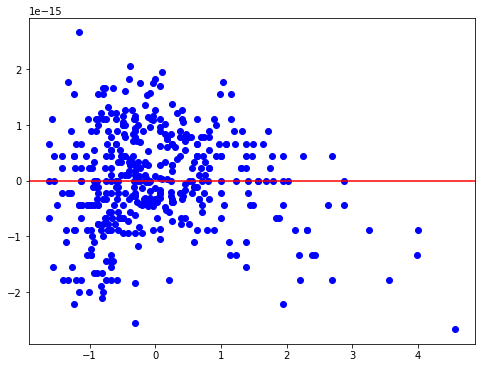

In [73]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

plt.scatter(y_pred,error,color='blue')
plt.axhline(color='r')
plt.plot()
plt.show()

In [75]:
#14  Predic on the test set
y_pred=model.predict(X_test)
print(y_pred[:5])

[-0.86515198 -0.7190629  -1.60514936  0.07131649 -1.08990441]


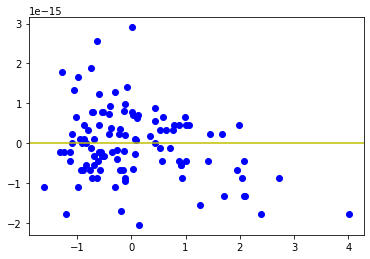

In [79]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
error=y_pred-y_test
plt.scatter(y_pred,error,color='blue')
plt.axhline(color='y')
plt.show()

In [91]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mse",mse)
print("r2",r2)

mse 7.74225963455104e-31
r2 1.0


In [99]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
y= df['price']
X = df.drop(columns=['price'])
def adjust(X,y):
    model=LinearRegression().fit(X,y)
    r2=model.score(X,y)
    n, p=X.shape
    return 1-(1-r2)*(n-1)/(n-p-1)

adj_r2_X1 = adjust(X[['area', 'bedrooms']], y)
adj_r2_X2 = adjust(X[['area', 'bedrooms', 'bathrooms']], y)
print(f"adjust R2-X1:,{adj_r2_X1}")
print(f"adjust R2-X2:,{adj_r2_X2}")

    

adjust R2-X1:,0.3681699478636079
adjust R2-X2:,0.48423879535674064
